In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import HuberRegressor
import numpy.random as rgt
from dphuber import huberReg
#import tfhuber
from sklearn import linear_model

In [111]:
from pyexpectreg.retire import high_dim

In [2]:
# Assuming huberReg is your custom class for noisy Huber regression

def l2_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

def run_experiment(n, d, repetitions, eta, epsilon, T, delta, epsilon2=None):
    errors_noisy = []
    errors_ordinary = []
    if epsilon2 is not None:
        errors_noisy2 = []
    
    for _ in range(repetitions):
        # Generate sample data
        X = np.random.uniform(-1/np.sqrt(d), 1/np.sqrt(d), (n, d))
        truebeta = np.random.normal(0, 1, d)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        Y = X.dot(truebeta) + rgt.standard_t(2, n) +1
        beta0 = np.zeros(d+1)

        # Noisy Huber Regression
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta)
        if epsilon2 is not None:
            noisy_huber_result2 = noisy_huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon2, T=T, delta=delta, eta=eta)
            error_noisy2 = l2_distance(noisy_huber_result2[0][1:], truebeta)
            errors_noisy2.append(error_noisy2)
        error_noisy = l2_distance(noisy_huber_result[0][1:], truebeta)  # Assuming the first return value is the regression result
        errors_noisy.append(error_noisy)

        # Ordinary Huber Regression
        huber_reg = HuberRegressor().fit(X, Y)
        ordinary_huber_coefficients = huber_reg.coef_
        error_ordinary = l2_distance(ordinary_huber_coefficients, truebeta)
        errors_ordinary.append(error_ordinary)
        #error_between = l2_distance(ordinary_huber_coefficients,noisy_huber_result[0][1:])
        #errors_between.append(error_between)
    if epsilon2 is not None:
        return np.mean(errors_noisy),np.mean(errors_noisy2),np.mean(errors_ordinary)
    else:
        return np.mean(errors_noisy), np.mean(errors_ordinary)

In [4]:
!pip install tfhuber

In [3]:
import tfHuber as tf

## Lowdim

### Error is t(2)

In [154]:
# Parameters
d = 5
eta = 1
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(2000, 30000, 500))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_ordinary = []
mean_errors_noisy2 = []
for n in sample_sizes:
    errors_noisy = []
    errors_noisy2 = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(d), 1/np.sqrt(d), (n, d))
        truebeta = np.random.normal(0, 1, d)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        Y = X.dot(truebeta) + rgt.standard_t(2, n) +1
        beta0 = np.zeros(d+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        # Noisy Huber Regression2
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result2 = noisy_huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon2, T=T, delta=10/(n**1.1), eta=eta)
        errors_noisy2.append(l2_distance(noisy_huber_result2[0][1:], truebeta))
        #Ordinary Huber
        huber_reg = HuberRegressor().fit(X, Y)
        ordinary_huber_coefficients = huber_reg.coef_
        errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_noisy2.append(np.mean(errors_noisy2))
    mean_errors_ordinary.append(np.mean(errors_ord))


        

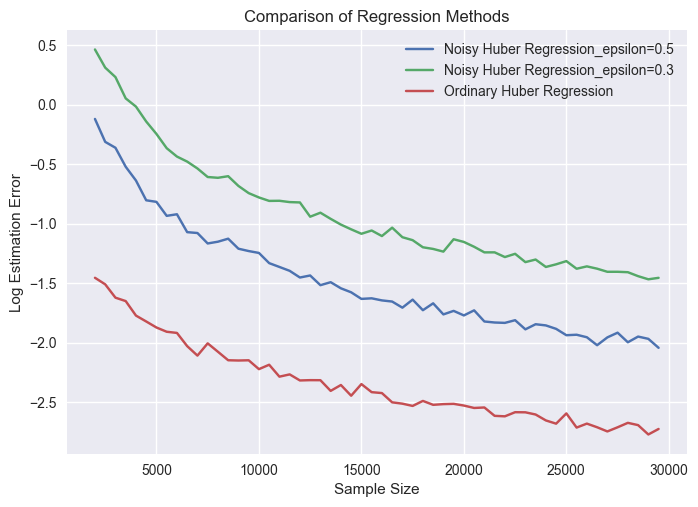

In [155]:
plt.style.use('seaborn-v0_8')
plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.savefig('lowdim_t2_comparison.png', dpi=300)
plt.show()

### Normal error

In [156]:
# Parameters
d = 5
eta = 1
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(2000, 30000, 500))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_ordinary = []
mean_errors_noisy2 = []
for n in sample_sizes:
    errors_noisy = []
    errors_noisy2 = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(d), 1/np.sqrt(d), (n, d))
        truebeta = np.random.normal(0, 1, d)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 1, n)+1
        #Y = X.dot(truebeta) + rgt.standard_t(2, n) +1
        beta0 = np.zeros(d+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        # Noisy Huber Regression2
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result2 = noisy_huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon2, T=T, delta=10/(n**1.1), eta=eta)
        errors_noisy2.append(l2_distance(noisy_huber_result2[0][1:], truebeta))
        #Ordinary Huber
        huber_reg = HuberRegressor().fit(X, Y)
        ordinary_huber_coefficients = huber_reg.coef_
        errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_noisy2.append(np.mean(errors_noisy2))
    mean_errors_ordinary.append(np.mean(errors_ord))


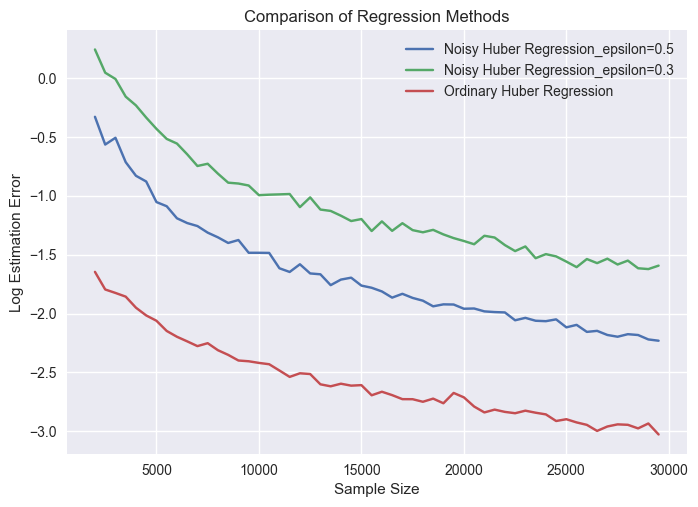

In [157]:
plt.style.use('seaborn-v0_8')
plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.savefig('lowdim_n01_comparison.png', dpi=300)
plt.show()

In [160]:
# Parameters
d = 5
eta = 1
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(2000, 30000, 500))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_ordinary = []
mean_errors_noisy2 = []
for n in sample_sizes:
    errors_noisy = []
    errors_noisy2 = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        #X = np.random.normal(0, 1, size=(n,d))
        X = np.random.uniform(-1, 1, (n, d))
        truebeta = np.random.normal(0, 1, d)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        Y = X.dot(truebeta) + rgt.standard_t(2, n) +1
        beta0 = np.zeros(d+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        # Noisy Huber Regression2
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result2 = noisy_huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon2, T=T, delta=10/(n**1.1), eta=eta)
        errors_noisy2.append(l2_distance(noisy_huber_result2[0][1:], truebeta))
        #Ordinary Huber
        huber_reg = HuberRegressor().fit(X, Y)
        ordinary_huber_coefficients = huber_reg.coef_
        errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_noisy2.append(np.mean(errors_noisy2))
    mean_errors_ordinary.append(np.mean(errors_ord))


        

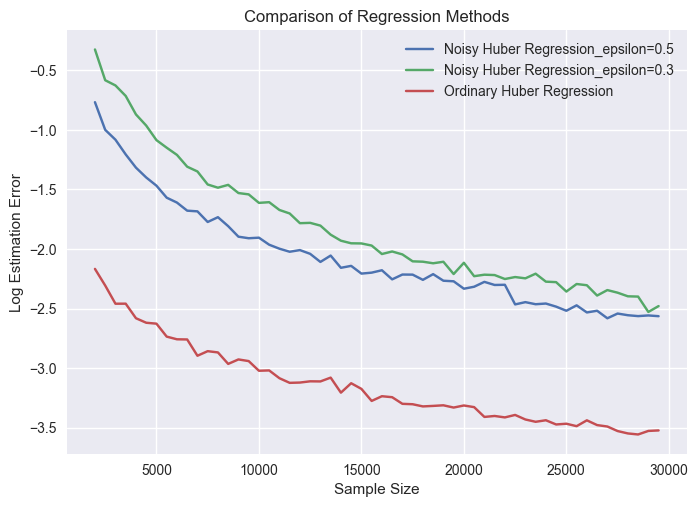

In [161]:
plt.style.use('seaborn-v0_8')
plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.savefig('lowdim_t2_comparison_unif1.png', dpi=300)
plt.show()

# Highdim

In [ ]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(200, 2000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_noisy2 = []

for n in sample_sizes:
    errors_noisy = []
    errors_noisy2 = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        #Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        noisy_huber_regression2 = huberReg(X, Y,intercept=False)
        noisy_huber_result2 = noisy_huber_regression2.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon2, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy2.append(l2_distance(noisy_huber_result2[0][:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_noisy2.append(np.mean(errors_noisy2))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_noisy2, label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.savefig('my_plot_high_n01.png', dpi=300)
plt.show()

## comparison with DP-ls

### t2 error

In [163]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(200, 3000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_noisy_ls = []
mean_errors_noisy2 = []
mean_errors_noisy_ls2 = []

for n in sample_sizes:
    errors_noisy = []
    errors_noisy_ls = []
    errors_noisy2 = []
    errors_noisy_ls2 = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        Y = X.dot(truebeta) + rgt.standard_t(2, n)
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy LS Regression1
        noisy_ls = huberReg(X, Y,intercept=False)
        noisy_ls_result = noisy_ls.noisy_ls_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy_ls.append(l2_distance(noisy_ls_result[0][:], truebeta))

        # Noisy Huber Regression2
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result2 = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon2, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy2.append(l2_distance(noisy_huber_result2[0][:], truebeta))

        # Noisy LS Regression2
        noisy_ls = huberReg(X, Y,intercept=False)
        noisy_ls_result2 = noisy_ls.noisy_ls_highdim(beta0=beta0, epsilon=epsilon2, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy_ls2.append(l2_distance(noisy_ls_result2[0][:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_noisy_ls.append(np.mean(errors_noisy_ls))
    mean_errors_noisy2.append(np.mean(errors_noisy2))
    mean_errors_noisy_ls2.append(np.mean(errors_noisy_ls2))
   

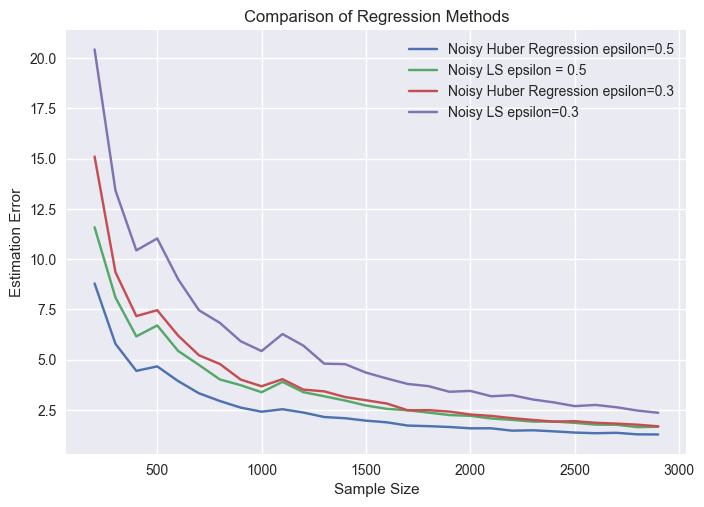

In [164]:
plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression epsilon=0.5')
plt.plot(sample_sizes, mean_errors_noisy_ls, label='Noisy LS epsilon = 0.5')
plt.plot(sample_sizes, mean_errors_noisy2, label='Noisy Huber Regression epsilon=0.3')
plt.plot(sample_sizes, mean_errors_noisy_ls2, label='Noisy LS epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.savefig('high_t2_noisylscomparison.png', dpi=300)
plt.show()

### normal error

In [165]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(200, 3000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_noisy_ls = []
mean_errors_noisy2 = []
mean_errors_noisy_ls2 = []

for n in sample_sizes:
    errors_noisy = []
    errors_noisy_ls = []
    errors_noisy2 = []
    errors_noisy_ls2 = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        #Y = X.dot(truebeta) + rgt.standard_t(2, n)
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy LS Regression1
        noisy_ls = huberReg(X, Y,intercept=False)
        noisy_ls_result = noisy_ls.noisy_ls_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy_ls.append(l2_distance(noisy_ls_result[0][:], truebeta))

        # Noisy Huber Regression2
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result2 = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon2, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy2.append(l2_distance(noisy_huber_result2[0][:], truebeta))

        # Noisy LS Regression2
        noisy_ls = huberReg(X, Y,intercept=False)
        noisy_ls_result2 = noisy_ls.noisy_ls_highdim(beta0=beta0, epsilon=epsilon2, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy_ls2.append(l2_distance(noisy_ls_result2[0][:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_noisy_ls.append(np.mean(errors_noisy_ls))
    mean_errors_noisy2.append(np.mean(errors_noisy2))
    mean_errors_noisy_ls2.append(np.mean(errors_noisy_ls2))
   

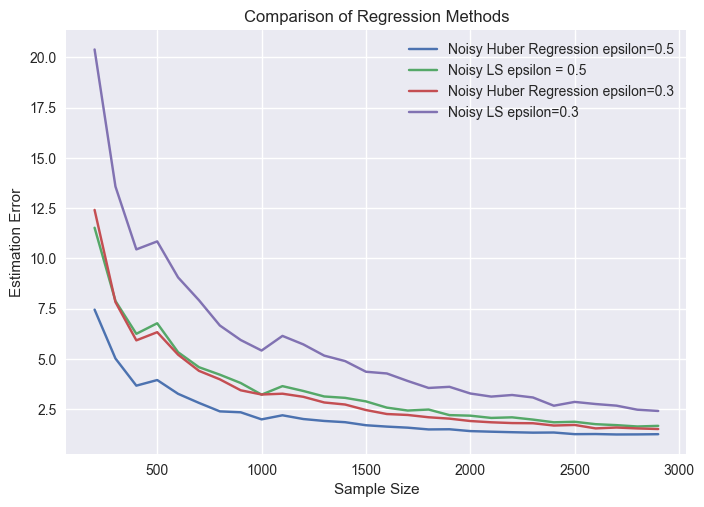

In [166]:
plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression epsilon=0.5')
plt.plot(sample_sizes, mean_errors_noisy_ls, label='Noisy LS epsilon = 0.5')
plt.plot(sample_sizes, mean_errors_noisy2, label='Noisy Huber Regression epsilon=0.3')
plt.plot(sample_sizes, mean_errors_noisy_ls2, label='Noisy LS epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.savefig('high_n01_noisylscomparison.png', dpi=300)
plt.show()

## Heavy tail

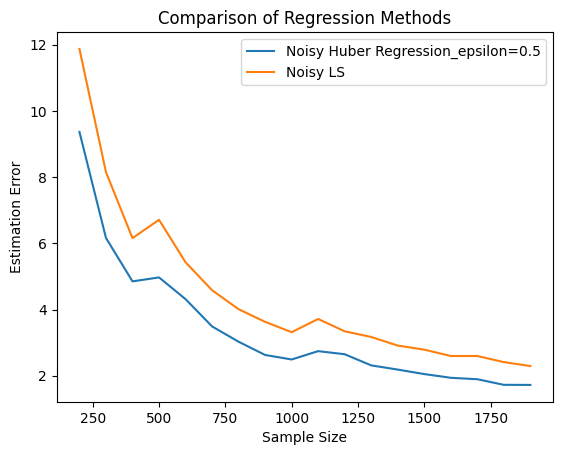

In [10]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(200, 2000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_noisy_ls = []

for n in sample_sizes:
    errors_noisy = []
    errors_noisy_ls = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        Y = X.dot(truebeta) + rgt.standard_t(1.5, n)
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        noisy_ls = huberReg(X, Y,intercept=False)
        noisy_ls_result = noisy_ls.noisy_ls_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy_ls.append(l2_distance(noisy_ls_result[0][:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_noisy_ls.append(np.mean(errors_noisy_ls))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_noisy_ls, label='Noisy LS')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.savefig('my_plot_high_t15.png', dpi=300)
plt.show()

## Comparison with ord huber

### d=1000 fixed

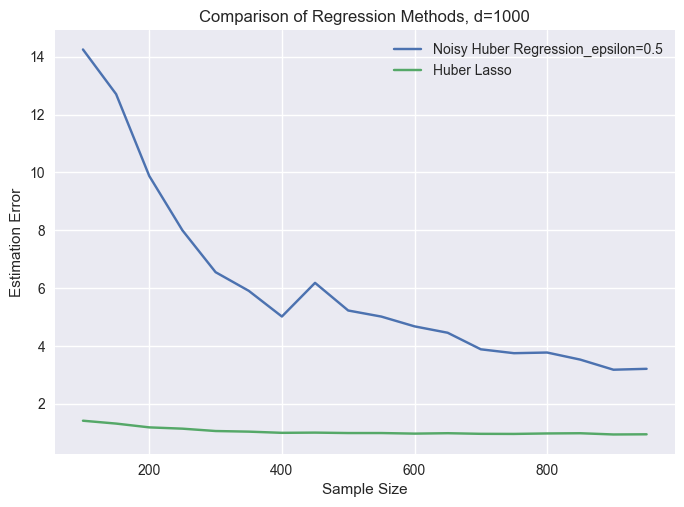

In [172]:
# Parameters
d = 1000
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(100, 1000, 50))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_ord = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        #X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        #X = np.random.uniform(-1, 1, (n, d))
        X = rgt.normal(0, 1, size=(n, d))
        truebeta = np.zeros(d)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        Y = X.dot(truebeta) + rgt.standard_t(2, n)
        beta0 = np.zeros(d)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        #ord_huber = huberReg(X, Y, intercept=False)
        #ord_result = ord_huber.l1huber()
        model1 = high_dim(X,Y)
        model1 = model1.l1(robust=True)
        errors_ord.append(l2_distance(model1['beta'][1:], truebeta))
        
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_ord.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_ord, label='Huber Lasso')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods, d=1000')
plt.legend()
plt.savefig('highdim_d1000_t2_normald.png', dpi=300)
plt.show()

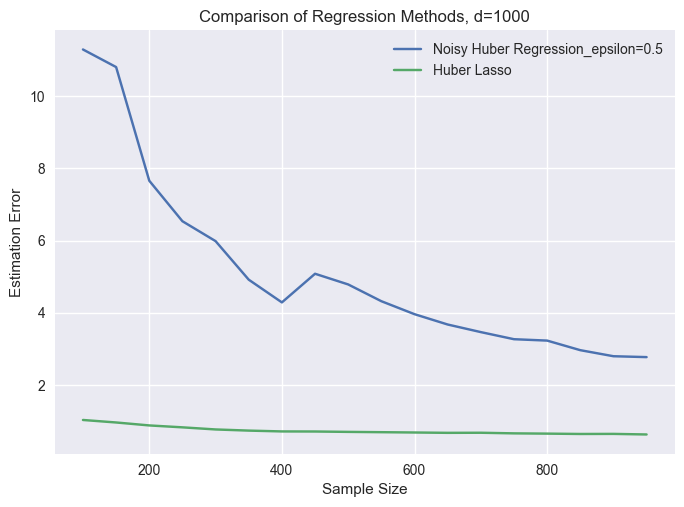

In [173]:
# Parameters
d = 1000
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(100, 1000, 50))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_ord = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        #X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        #X = np.random.uniform(-1, 1, (n, d))
        X = rgt.normal(0, 1, size=(n, d))
        truebeta = np.zeros(d)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        #Y = X.dot(truebeta) + rgt.standard_t(2, n)
        beta0 = np.zeros(d)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        #ord_huber = huberReg(X, Y, intercept=False)
        #ord_result = ord_huber.l1huber()
        model1 = high_dim(X,Y)
        model1 = model1.l1(robust=True)
        errors_ord.append(l2_distance(model1['beta'][1:], truebeta))
        
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_ord.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_ord, label='Huber Lasso')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods, d=1000')
plt.legend()
plt.savefig('highdim_d1000_n01_normald.png', dpi=300)
plt.show()

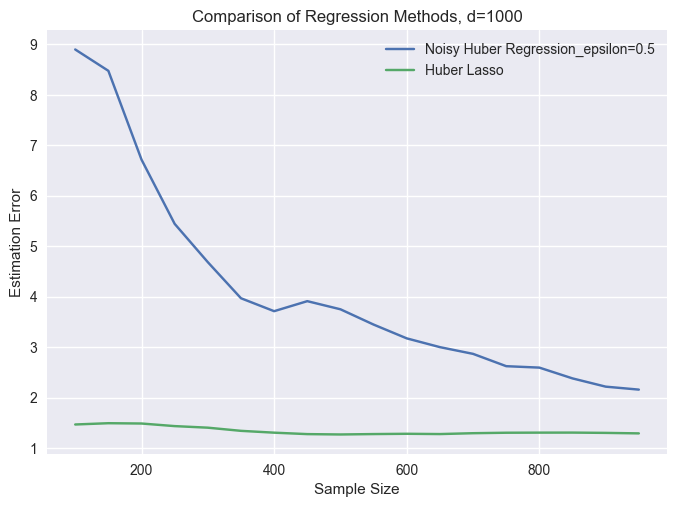

In [174]:
# Parameters
d = 1000
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(100, 1000, 50))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_ord = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        #X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        X = np.random.uniform(-1, 1, (n, d))
        #X = rgt.normal(0, 1, size=(n, d))
        truebeta = np.zeros(d)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        #Y = X.dot(truebeta) + rgt.standard_t(2, n)
        beta0 = np.zeros(d)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        #ord_huber = huberReg(X, Y, intercept=False)
        #ord_result = ord_huber.l1huber()
        model1 = high_dim(X,Y)
        model1 = model1.l1(robust=True)
        errors_ord.append(l2_distance(model1['beta'][1:], truebeta))
        
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_ord.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_ord, label='Huber Lasso')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods, d=1000')
plt.legend()
plt.savefig('highdim_d1000_n01_unifd.png', dpi=300)
plt.show()

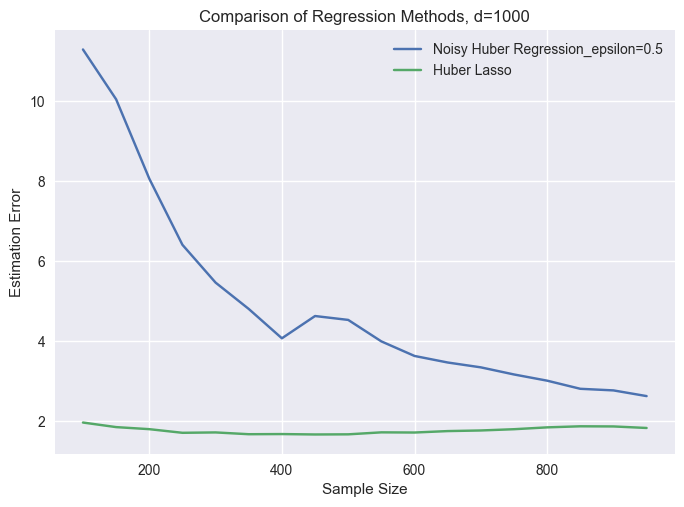

In [175]:
# Parameters
d = 1000
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(100, 1000, 50))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_ord = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        #X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        X = np.random.uniform(-1, 1, (n, d))
        #X = rgt.normal(0, 1, size=(n, d))
        truebeta = np.zeros(d)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        Y = X.dot(truebeta) + rgt.standard_t(2, n)
        beta0 = np.zeros(d)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        #ord_huber = huberReg(X, Y, intercept=False)
        #ord_result = ord_huber.l1huber()
        model1 = high_dim(X,Y)
        model1 = model1.l1(robust=True)
        errors_ord.append(l2_distance(model1['beta'][1:], truebeta))
        
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_ord.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_ord, label='Huber Lasso')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods, d=1000')
plt.legend()
plt.savefig('highdim_d1000_t2_unifd.png', dpi=300)
plt.show()

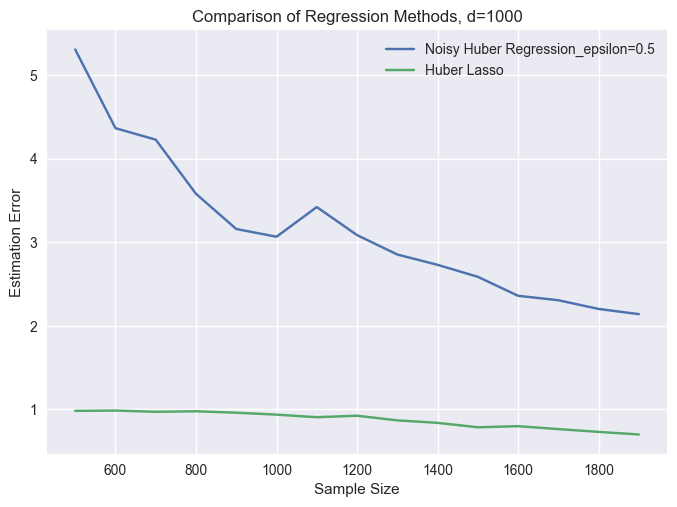

In [153]:
plt.style.use('seaborn-v0_8')
plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_ord, label='Huber Lasso')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods, d=1000')
plt.legend()
#plt.savefig('my_plot_high_t2.png', dpi=300)
plt.show()

## d=n

### Uniform design

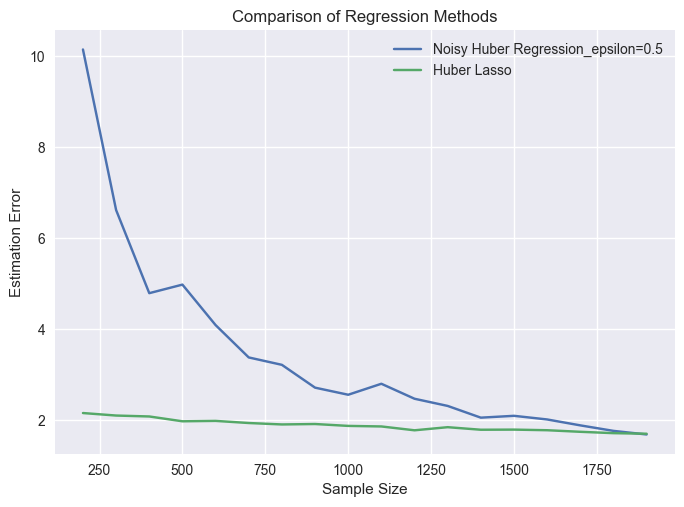

In [169]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(200, 2000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_ord = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        #X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        X = np.random.uniform(-1, 1, (n, n))
        #X = rgt.normal(0, 1, size=(n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        Y = X.dot(truebeta) + rgt.standard_t(2, n)
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        #ord_huber = huberReg(X, Y, intercept=False)
        #ord_result = ord_huber.l1huber()
        model1 = high_dim(X,Y)
        model1 = model1.l1(robust=True)
        errors_ord.append(l2_distance(model1['beta'][1:], truebeta))
        
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_ord.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_ord, label='Huber Lasso')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.savefig('highdim_huberlassocomparison_dn_t2.png', dpi=300)
plt.show()

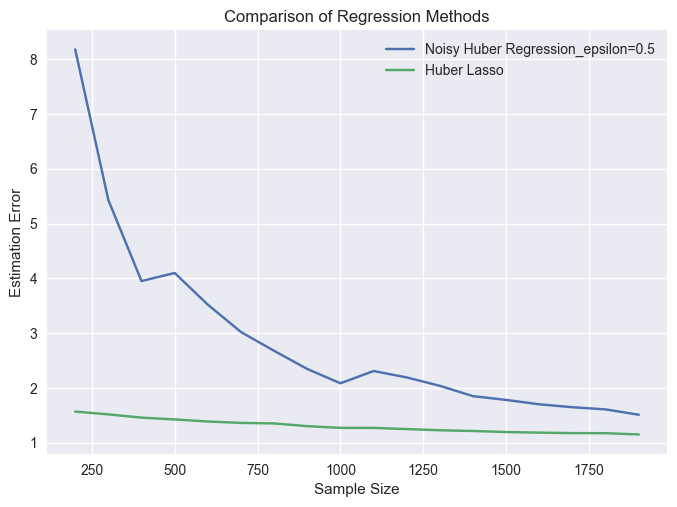

In [168]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(200, 2000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_ord = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        #X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        X = np.random.uniform(-1, 1, (n, n))
        #X = rgt.normal(0, 1, size=(n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        #Y = X.dot(truebeta) + rgt.standard_t(2, n)
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        #ord_huber = huberReg(X, Y, intercept=False)
        #ord_result = ord_huber.l1huber()
        model1 = high_dim(X,Y)
        model1 = model1.l1(robust=True)
        errors_ord.append(l2_distance(model1['beta'][1:], truebeta))
        
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_ord.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_ord, label='Huber Lasso')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.savefig('highdim_huberlassocomparison_dn_n01.png', dpi=300)
plt.show()

### Normal design

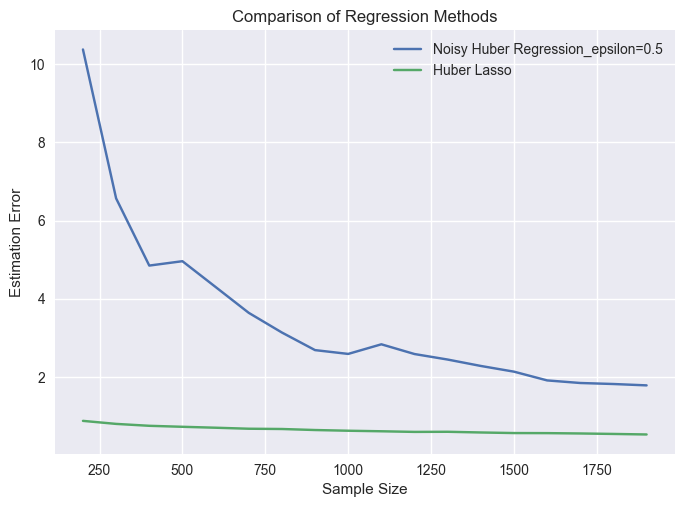

In [170]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(200, 2000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_ord = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        #X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        #X = np.random.uniform(-1, 1, (n, n))
        X = rgt.normal(0, 1, size=(n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        #Y = X.dot(truebeta) + rgt.standard_t(2, n)
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        #ord_huber = huberReg(X, Y, intercept=False)
        #ord_result = ord_huber.l1huber()
        model1 = high_dim(X,Y)
        model1 = model1.l1(robust=True)
        errors_ord.append(l2_distance(model1['beta'][1:], truebeta))
        
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_ord.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_ord, label='Huber Lasso')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.savefig('highdim_huberlassocomparison_dn_n01_normald.png', dpi=300)
plt.show()

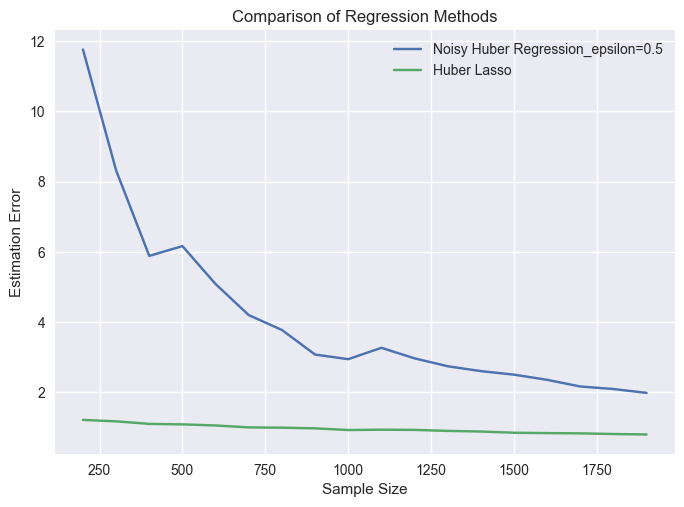

In [171]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(200, 2000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_ord = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        #X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        #X = np.random.uniform(-1, 1, (n, n))
        X = rgt.normal(0, 1, size=(n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        Y = X.dot(truebeta) + rgt.standard_t(2, n)
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        #ord_huber = huberReg(X, Y, intercept=False)
        #ord_result = ord_huber.l1huber()
        model1 = high_dim(X,Y)
        model1 = model1.l1(robust=True)
        errors_ord.append(l2_distance(model1['beta'][1:], truebeta))
        
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_ord.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_ord, label='Huber Lasso')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.savefig('highdim_huberlassocomparison_dn_t2_normald.png', dpi=300)
plt.show()

In [144]:
n=1000
X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
#X = rgt.normal(0, 1, size=(n, n))
truebeta = np.zeros(n)
#truebeta[:20] = np.random.randn(20)
truebeta[:5] = [1,2,3,4,5]
#truebeta /= np.linalg.norm(truebeta)
Y = X.dot(truebeta) + rgt.standard_t(2, n)
#Y = X.dot(truebeta) +np.random.normal(0, 1, n)

In [145]:
model1 = high_dim(X,Y)
model1 = model1.l1(robust=True)

In [146]:
l2_distance(truebeta,model1['beta'][1:])

67.08655642618449

In [109]:
l2_distance(truebeta,ord_result['beta'])

6.915184871120972

## LS and Huber comparison (LASSO)

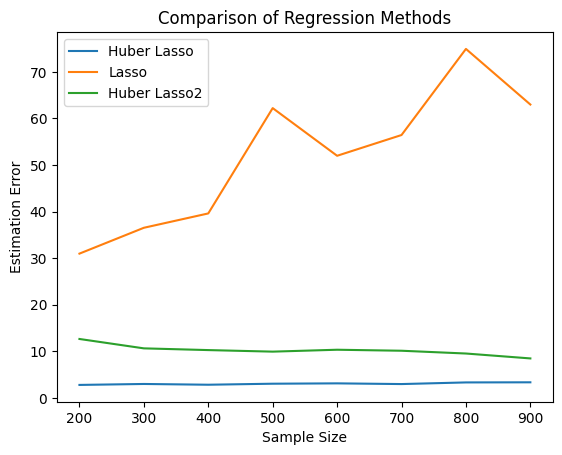

In [134]:
repetitions = 100
sample_sizes = np.array(range(200, 1000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_huberlasso = []
mean_errors_lasso = []
mean_errors_huberlasso2 = []

for n in sample_sizes:
    errors_huberlasso = []
    errors_huberlasso2 = []
    errors_lasso = []
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        #X = rgt.normal(0, 1, size=(n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        Y = X.dot(truebeta) + rgt.standard_t(2, n)
        
        # HuberLasso
        huberlasso = huberReg(X, Y,intercept=False)
        huberlasso_result = huberlasso.l1huber(standardize=False)
        Lambda = huberlasso_result['lambda']
        errors_huberlasso.append(l2_distance(huberlasso_result['beta'], truebeta))

        # Noisy Huber Regression2
        lasso = linear_model.Lasso(alpha=Lambda)
        lasso.fit(X,Y)
        errors_lasso.append(l2_distance(lasso.coef_, truebeta))

        # Other Implementation
        model1 = high_dim(X,Y)
        model1 = model1.l1(robust=True, standardize=False)
        errors_huberlasso2.append(l2_distance(model1['beta'][1:], truebeta))
    mean_errors_huberlasso.append(np.mean(errors_huberlasso))
    mean_errors_lasso.append(np.mean(errors_lasso))
    mean_errors_huberlasso2.append(np.mean(errors_huberlasso2))
   
    

plt.plot(sample_sizes, mean_errors_huberlasso, label='Huber Lasso')
plt.plot(sample_sizes, mean_errors_lasso, label='Lasso')
plt.plot(sample_sizes, mean_errors_huberlasso2, label='Huber Lasso2')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_high_t2.png', dpi=300)
plt.show()

In [ ]:
lambda_max = np.max(np.abs(self.Y.dot(X)))/self.n
lambda_min = 0.01 * lambda_max
Lambda =  math.exp(0.7 * math.log(lambda_max) + 0.3 * math.log(lambda_min))

In [35]:
ord_huber = huberReg(X, Y)
#beta0 = np.zeros(n)
ord_result = ord_huber.l1huber(tol=1e-8, phi = 0.001, standardize=True)

In [42]:
l2_distance(truebeta, clf.coef_)

1.7717311862258707

## LS and Huber comparison

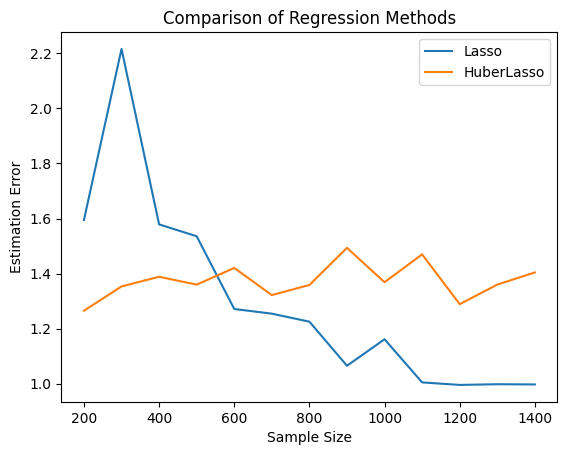

In [57]:
# Parameters

repetitions = 100
sample_sizes = np.array(range(200, 1500, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_huberlasso = []
mean_errors_lasso = []

for n in sample_sizes:
    errors_huberlasso = []
    errors_lasso = []

    for m in range(repetitions):
        X = rgt.normal(0, 1, size=(n, n))
        truebeta = np.zeros(n)
        truebeta[:5] = np.random.randn(5)
        #truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        Y = X.dot(truebeta) + rgt.standard_t(2, n)
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        clf=linear_model.Lasso(alpha=0.1)
        clf.fit(X,Y)
        errors_lasso.append(l2_distance(clf.coef_, truebeta))

        # huberlasso
        ord_huber = huberReg(X, Y,intercept=False)
        ord_result = ord_result = ord_huber.l1huber()
        errors_huberlasso.append(l2_distance(ord_result['beta'], truebeta))
        
    mean_errors_lasso.append(np.mean(errors_lasso))
    mean_errors_huberlasso.append(np.mean(errors_huberlasso))
   
    

plt.plot(sample_sizes, mean_errors_lasso, label='Lasso')
plt.plot(sample_sizes, mean_errors_huberlasso, label='HuberLasso')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.show()

In [ ]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 50
sample_sizes = np.array(range(200, 1500, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
#mean_errors_ordinary = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(1.5*np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:10] = np.random.randn(10)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta, s=15)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    #mean_errors_ordinary.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
#plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()

In [ ]:
# Parameters
#d = 5
eta = 0.1
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 50
sample_sizes = np.array(range(200, 1500, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
#mean_errors_ordinary = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:10] = np.random.randn(10)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta, s=20)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    #mean_errors_ordinary.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
#plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()

In [ ]:
# Parameters
#d = 5
eta = 0.7
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 50
sample_sizes = np.array(range(200, 1500, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
#mean_errors_ordinary = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:10] = np.random.randn(10)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        #Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta, s=15)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    #mean_errors_ordinary.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
#plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()

In [ ]:
# Parameters
#d = 5
eta = 1.5
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 50
sample_sizes = np.array(range(200, 1500, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
#mean_errors_ordinary = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:10] = np.random.randn(10)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        #Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta, s=15)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    #mean_errors_ordinary.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
#plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()

In [ ]:
# Parameters
#d = 5
eta = 2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 50
sample_sizes = np.array(range(200, 1500, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
#mean_errors_ordinary = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:10] = np.random.randn(10)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        #Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta, s=15)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    #mean_errors_ordinary.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
#plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()

In [ ]:
# Parameters
#d = 5
eta = 0.5
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 50
sample_sizes = np.array(range(200, 2000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_noisy2 = []

for n in sample_sizes:
    errors_noisy = []
    errors_noisy2 = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:10] = np.random.randn(10)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        #Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta, s=10, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        noisy_huber_regression2 = huberReg(X, Y,intercept=False)
        noisy_huber_result2 = noisy_huber_regression2.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon2, T=T, delta=delta, eta=eta, s=10, 
                                                                           standardize=False)
        errors_noisy2.append(l2_distance(noisy_huber_result2[0][:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_noisy2.append(np.mean(errors_noisy2))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
#plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()